# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.filters import threshold_local
from scipy import fftpack
from scipy.signal import convolve2d
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 
    


In [3]:
# This function applies a filter to an image in the frequency domain
# and plots multiple images describing the process
def apply_filter_in_freq(img, f):
    img_in_freq = fftpack.fft2(img)
    
    # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
    filter_in_freq = fftpack.fft2(f, img.shape)
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = fftpack.ifft2(filtered_img_in_freq)
     
    
    show_images([img,
                fftpack.fftshift(np.log(np.abs(img_in_freq)+1)), # log for better intensity scale, 
                                                                 # shift to make zero freq at center
                fftpack.fftshift(np.log(np.abs(filter_in_freq)+1)),
                fftpack.fftshift(np.log(np.abs(filtered_img_in_freq)+1)),
                np.abs(filtered_img)
             ], ['Image', 'Image in Freq. Domain', 'Filter in Freq. Domain', 'Filtered Image in Freq. Domain', 'Filtered Image'])
    return  filtered_img

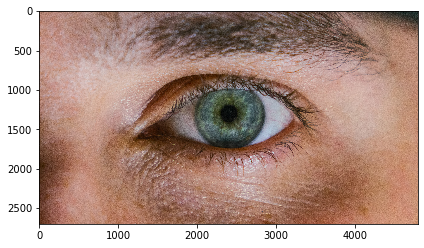

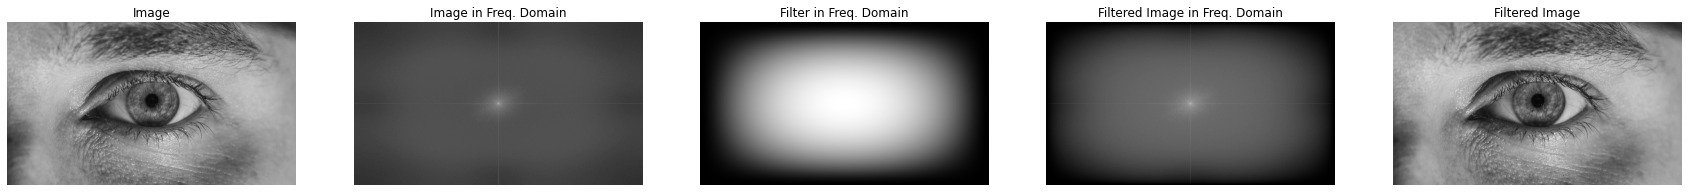

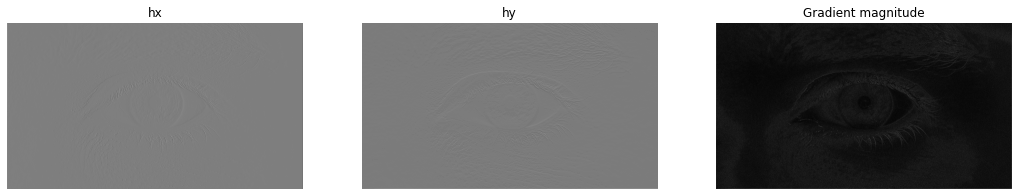

In [4]:
img = io.imread('images/colorful_eye1.jpg')
io.imshow(img)
io.show()
gray_img =rgb2gray(img)
# io.imshow(gray_img)
# io.show()

hy = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])
                     
hx= np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
]) 
f=np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

filtered_img=apply_filter_in_freq(gray_img, f)


# show_images([filtered_img.astype(np.uint8)])


img_x = convolve2d( gray_img, hx)
img_y = convolve2d(gray_img, hy)

# io.imshow(img_x)
# io.show()
# io.imshow(img_y)
# io.show()
gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
 
gradient_magnitude *= 255.0 / gradient_magnitude.max()
# io.imshow(gradient_magnitude)
# io.show()

show_images([img_x,img_y,gradient_magnitude],["hx","hy","Gradient magnitude"])